In [64]:
%load_ext autoreload
%autoreload 2
from wind.odecache import MultiODECache,ODECache
import matplotlib.pyplot as plt
%matplotlib inline
from abg_python.all_utils import *
from distinct_colours import get_distinct

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
savefig = 1
if savefig:
    plt.style.use('ABG_black_presentation')

In [485]:
ntiles =[1, 5 ,10, 15, 20, 25, 30, 40, 45, 50, 100, 200]

names = ['NR_test_%d'%ntile for ntile in ntiles]
multi_odes = MultiODECache(names,'../../ntile_data')

../../ntile_data/NR_test_1 NR_test_1.hdf5
['RK2', 'SIE'] solvers used
../../ntile_data/NR_test_5 NR_test_5.hdf5
['RK2', 'SIE'] solvers used
../../ntile_data/NR_test_10 NR_test_10.hdf5
['RK2', 'SIE'] solvers used
../../ntile_data/NR_test_15 NR_test_15.hdf5
['RK2', 'SIE'] solvers used
../../ntile_data/NR_test_20 NR_test_20.hdf5
['RK2', 'SIE'] solvers used
../../ntile_data/NR_test_25 NR_test_25.hdf5
['RK2', 'SIE'] solvers used
../../ntile_data/NR_test_30 NR_test_30.hdf5
['RK2', 'SIE'] solvers used
../../ntile_data/NR_test_40 NR_test_40.hdf5
['RK2', 'SIE'] solvers used
../../ntile_data/NR_test_45 NR_test_45.hdf5
['RK2', 'SIE'] solvers used
../../ntile_data/NR_test_50 NR_test_50.hdf5
['RK2', 'SIE'] solvers used
../../ntile_data/NR_test_100 NR_test_100.hdf5
['RK2', 'SIE'] solvers used
../../ntile_data/NR_test_200 NR_test_200.hdf5
['RK2', 'SIE'] solvers used
[ODECache NR_test_1 - RK2 - SIE, ODECache NR_test_5 - RK2 - SIE, ODECache NR_test_10 - RK2 - SIE, ODECache NR_test_15 - RK2 - SIE, ODECa

In [448]:
ntiles =[1, 5 ,10, 15, 20, 25, 30, 40, 45, 50, 100, 200]

names = ['Katz96_%d'%ntile for ntile in ntiles]
multi_odes = MultiODECache(names,'../../ntile_data')

../../ntile_data/Katz96_1 Katz96_1.hdf5
['RK2', 'SIE'] solvers used
../../ntile_data/Katz96_5 Katz96_5.hdf5
['RK2', 'SIE'] solvers used
../../ntile_data/Katz96_10 Katz96_10.hdf5
['RK2', 'SIE'] solvers used
../../ntile_data/Katz96_15 Katz96_15.hdf5
['RK2', 'SIE'] solvers used
../../ntile_data/Katz96_20 Katz96_20.hdf5
['RK2', 'SIE'] solvers used
../../ntile_data/Katz96_25 Katz96_25.hdf5
['RK2', 'SIE'] solvers used
../../ntile_data/Katz96_30 Katz96_30.hdf5
['RK2', 'SIE'] solvers used
../../ntile_data/Katz96_40 Katz96_40.hdf5
['RK2', 'SIE'] solvers used
../../ntile_data/Katz96_45 Katz96_45.hdf5
['RK2', 'SIE'] solvers used
../../ntile_data/Katz96_50 Katz96_50.hdf5
['RK2', 'SIE'] solvers used
../../ntile_data/Katz96_100 Katz96_100.hdf5
['RK2', 'SIE'] solvers used
../../ntile_data/Katz96_200 Katz96_200.hdf5
['RK2', 'SIE'] solvers used
[ODECache Katz96_1 - RK2 - SIE, ODECache Katz96_5 - RK2 - SIE, ODECache Katz96_10 - RK2 - SIE, ODECache Katz96_15 - RK2 - SIE, ODECache Katz96_20 - RK2 - SIE, O

## Plot Memory Usage vs. Time

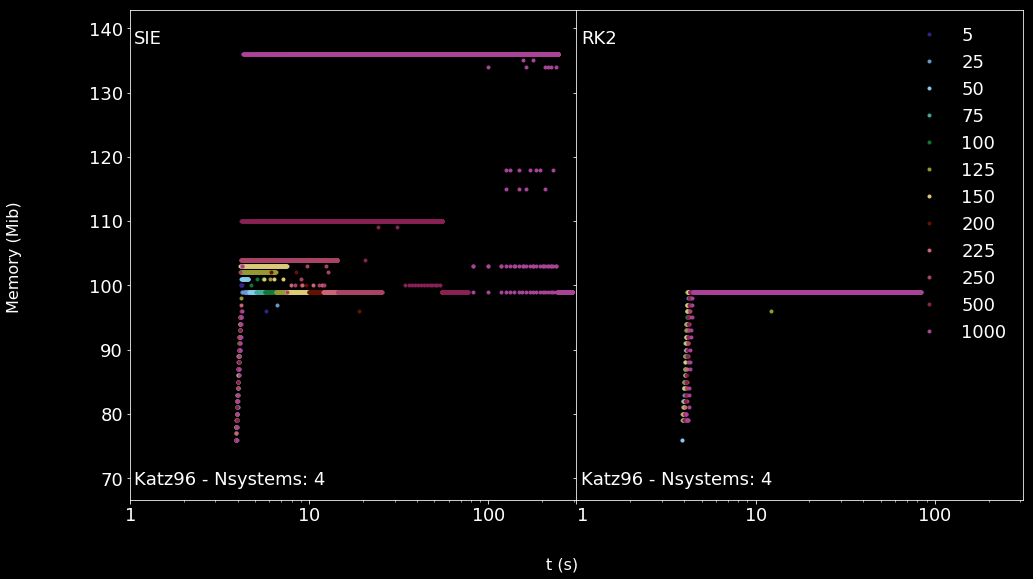

In [350]:
fig,axs = plt.subplots(ncols=2,nrows=1,sharex=True,sharey=True)
axs = axs.flatten()
for ax_i,(ax,solver) in enumerate(zip(axs,['SIE','RK2'])):
    for ode_i,ode_cache in enumerate(multi_odes):
        xs,ys = ode_cache.memory_times[solver],ode_cache.memory_usages[solver]
        
        neqn = ode_cache.Nequations_per_system
        label = neqn#"%d $N_\mathrm{eqn}$"%(neqn)
        ax.plot(xs,ys,'.',c=ode_cache.color,label=label)
        
    ylow = max(multi_odes[0].memory_usages['SIE']/1.5)
    nameAxes(
        ax,None,'t (s)', 'memory (Mib)',
        logflag=(1,0),ylow=ylow,xlow=1,
        supertitle=solver,
        subtitle="%s - Nsystems: %d"%(
            multi_odes.system_name,
            ode_cache.Nsystems),
        slackify=True,
        make_legend=ax_i,loc=0)
    
bufferAxesLabels(axs,1,2,
    ylabels=True,share_ylabel='Memory (Mib)',
    xlabels=True,share_xlabel='t (s)',
    label_offset=0.025)
plt.subplots_adjust(hspace=0,wspace=0)
fig.set_size_inches(16,9)
fig.set_facecolor('k')
if savefig:
    fig.savefig('%s_memory_vs_time.pdf'%multi_odes.system_name,facecolor='k')

In [468]:
def plot_something_vs_ntile(multi_odes,ode_cache_fn,ax = None,do_fit=True):
    colors = get_distinct(3)
    #colors = colors[::2]
    if ax is None:
        ## create a new figure
        fig = plt.figure()
        ax = plt.gca()
    else:
        fig = ax.get_figure()
    ## loop through each solver
    for solver_i,solver in enumerate(['SIE','RK2']):
        ## generate y values
        ys = [ode_cache_fn(ode_cache,solver) for ode_cache in multi_odes.ode_caches]
        neqns = np.array([ode_cache.Nequations_per_system for ode_cache in multi_odes.ode_caches])
        
        text_x = np.sum(neqns[-2:])/2
        ynorm = ys[-1]/40
        xnorm = neqns[-1]/400
        angle = np.arctan2(ynorm,xnorm)*180/np.pi
        if do_fit:
            if solver == 'SIE':
                fn = lambda pars,xs: pars[0]*xs**2+ys[0]
                p0=[1e-4]
                pf=fitLeastSq(fn,p0,neqns,ys)
                print(pf)

                eqn_label = r'%d ms + %.1f $\mu$s/eqn$^2$'%(ys[0]*1e3,pf[0]*1e6)
                text_y = fn(pf,text_x)
                angle*=0.6
                text_y/=100
                text_x/=2
            else:
                a,b = fitAXb(neqns,ys,None)
                fn = lambda pars,x: pars[0]*x + pars[1]
                pf = [a,b]
                text_x =np.sum(neqns[-2:])/2
                text_y = a*text_x + b
                eqn_label = r'%d ms + %.1f $\mu$s/eqn'%(b*1e3,a*1e6)
                
            ax.plot(neqns,fn(pf,neqns),c=colors[solver_i],lw=3,ls='--')
            ax.text(
                text_x,
                text_y,
                eqn_label,
                va='bottom',ha='right',
                color=colors[solver_i],
                rotation=angle,
                weight='bold')
            ax.plot(neqns[:len(ys)],ys,'.',markersize=16,lw=3,label=solver,c=colors[solver_i])
        else:
            ax.plot(neqns[:len(ys)],ys,lw=3,label=solver,c=colors[solver_i])
            
    return fig,ax

[0.00023885]


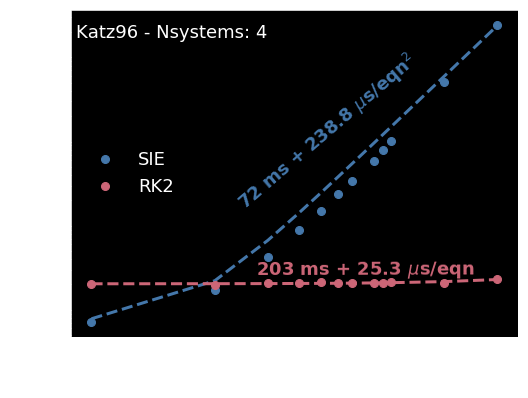

In [469]:
fig,ax = plot_something_vs_ntile(multi_odes,
    lambda ode_cache,solver: np.sum(ode_cache.walltimess[solver]))


nameAxes(
        ax,None,'$N_\mathrm{eqn}$', 'time to solution (s)',
        logflag=(1,1),
        supertitle="%s - Nsystems: %d"%(
            multi_odes.system_name,
            multi_odes[0].Nsystems),
        make_legend=True,
        loc=5)
fig.set_size_inches(8,6)
if savefig:
    fig.savefig('%s_tts_vs_neqn.pdf'%multi_odes.system_name,facecolor='k')

In [483]:
def plot_something_vs_ntile(multi_odes,ode_cache_fn,ax = None,do_fit=True):
    colors = get_distinct(3)
    #colors = colors[::2]
    if ax is None:
        ## create a new figure
        fig = plt.figure()
        ax = plt.gca()
    else:
        fig = ax.get_figure()
    ## loop through each solver
    for solver_i,solver in enumerate(['SIE','RK2']):
        ## generate y values
        ys = [ode_cache_fn(ode_cache,solver) for ode_cache in multi_odes.ode_caches]
        neqns = np.array([ode_cache.Nequations_per_system for ode_cache in multi_odes.ode_caches])
        
        text_x = np.sum(neqns[-2:])/2
        ynorm = ys[-1]/135
        xnorm = neqns[-1]/1000
        angle = np.arctan2(ynorm,xnorm)*180/np.pi
        if do_fit:
            text_x =np.sum(neqns[-2:])/2
            if solver == 'SIE':
                fn = lambda pars,xs: pars[0]*xs**2+pars[1]
                p0=[1,100]
                pf=fitLeastSq(fn,p0,neqns,ys)
                text_y = fn(pf,text_x)
                eqn_label = '%.1f Mib'%pf[1]
                eqn_label += ' + %d b/eqn$^2$'%(pf[0]*1e6)
                #text_y-=15
                angle*=1
                text_y-=10
                text_x+=300
                
            else:
                a,b = fitAXb(neqns,ys,None)
                fn = lambda pars,x: pars[0]*x + pars[1]
                pf = [a,b]
                angle=0
                text_y = a*text_x + b
                eqn_label = r'%.1f Mib'%(b)

            ax.plot(neqns,fn(pf,neqns),c=colors[solver_i],lw=3,ls='--')
            ax.text(
                text_x,
                text_y,
                eqn_label,
                va='bottom',ha='right',
                color=colors[solver_i],
                rotation=angle,
                weight='bold')
            ax.plot(neqns[:len(ys)],ys,'.',markersize=16,lw=3,label=solver,c=colors[solver_i])
        else:
            ax.plot(neqns[:len(ys)],ys,lw=3,label=solver,c=colors[solver_i])
            
    return fig,ax

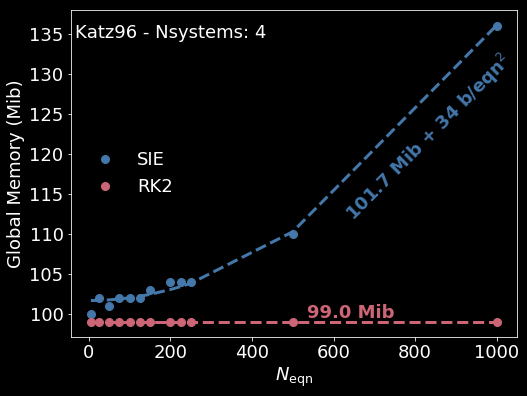

In [484]:
fig,ax = plot_something_vs_ntile(multi_odes,
    lambda ode_cache,solver:np.max(ode_cache.memory_usages[solver]),
    do_fit = True)


nameAxes(
        ax,None,'$N_\mathrm{eqn}$', 'Global Memory (Mib)',
        logflag=(0,0),
        supertitle="%s - Nsystems: %d"%(
            multi_odes.system_name,
            multi_odes[0].Nsystems),
        slackify=True,
        make_legend = True,
        loc=5)

fig.set_size_inches(8,6)
fig.set_facecolor('k')
if savefig:
    fig.savefig("%s_peak_memory_vs_neqn"%multi_odes.system_name,facecolor='k')

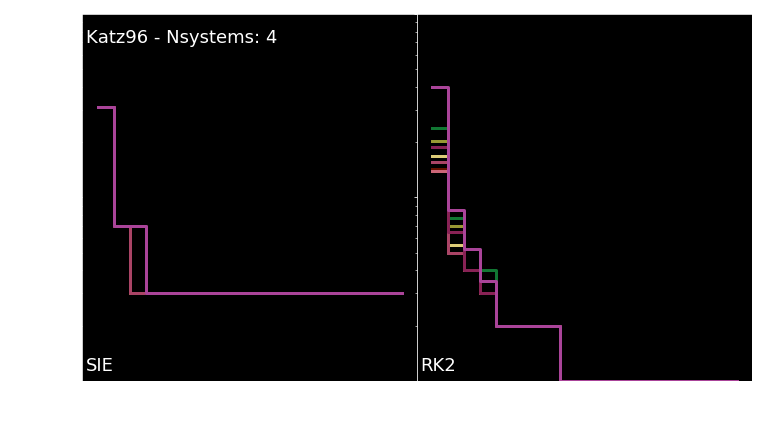

In [399]:
def plot_all_nsteps_histogram(multi_odes):
    fig,axs = plt.subplots(ncols=2,nrows=1,sharex=True,sharey=True)
    axs = axs.flatten()
    for ax,solver in zip(axs,['SIE','RK2']):
        for ode_cache in multi_odes:
            plot_nsteps_histogram(ax,ode_cache,solver)
    return fig,axs

def plot_nsteps_histogram(ax,ode_cache,solver):
    ## get enough colors for each ode system
    xs = ode_cache.timess[solver]
    ys = ode_cache.nstepss[solver]/ode_cache.Nsystems
    if solver == 'SIE':
        ys*=ode_cache.Nsystems
    ax.step(
        xs[1:],ys,
        lw=3,
        label=ode_cache.name,
        where='post',
        color=ode_cache.color)
    
    nameAxes(
        ax,None,
        '$t_\mathrm{ode}$ (yrs)',
        '$N_\mathrm{steps}$',
        logflag=(0,1))
    return ax

fig,axs = plot_all_nsteps_histogram(multi_odes)

nameAxes(axs[0],None,None,None,
        subtitle='SIE',
        supertitle="%s - Nsystems: %d"%(
            multi_odes.system_name,
            multi_odes[0].Nsystems),
        yhigh=100,ylow=1)

nameAxes(axs[1],None,None,None,
    subtitle='RK2',
    make_legend=False,
    yhigh=100,ylow=1)

bufferAxesLabels(axs,1,2,
    ylabels=True,share_xlabel='$t_\mathrm{ode}$ (yrs)',
    xlabels=True,share_ylabel= '$N_\mathrm{steps}/N_\mathrm{systems}$',
    label_offset=0.05)
plt.subplots_adjust(hspace=0,wspace=0)
fig.set_size_inches(12,6.75)
if savefig:
    fig.savefig("%s_nsteps_per_noutputsteps.pdf"%multi_odes.system_name,facecolor='k')

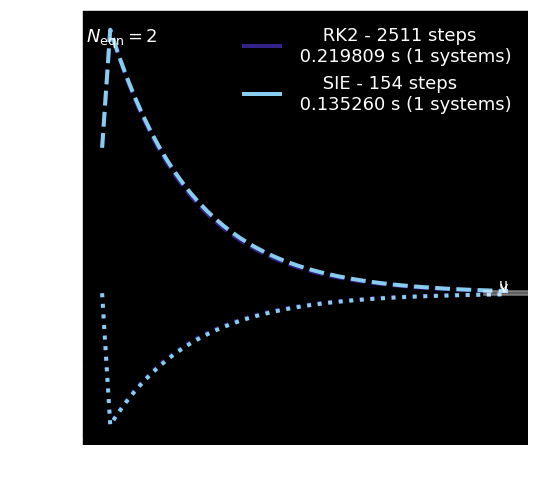

In [487]:
for frame_num,ode_cache in enumerate(multi_odes.ode_caches[:1]):
    fig,axs = ode_cache.plot_all_systems(
    xname = r'$t_\mathrm{ode}$ (yrs)',
    yname = r'$n_\mathrm{X}/n_\mathrm{H}$',
    supertitle = r"$N_\mathrm{eqn}=%d$"%ode_cache.Nequations_per_system,
    plot_eqm=True,
    loc=0)
    axs = np.array(axs)
    if len(axs)>1:
        bufferAxesLabels(axs,2,2,
            ylabels=True,share_ylabel=r'$n_\mathrm{X}/n_\mathrm{H}$',
            xlabels=True,share_xlabel=r'$t_\mathrm{ode}$ (yrs)',
            label_offset=0.075)
        plt.subplots_adjust(hspace=0,wspace=0)
        fig.set_size_inches(16,16)
    for ax in axs[1::2]:
        ax.set_yticklabels([])
    if savefig:
        fig.savefig(
            "%s_system_grid_frame_%02d.png"%(multi_odes.system_name,frame_num),
            facecolor='k')
if savefig:
    frame_num+=1
    fig.savefig(
        "%s_system_grid_frame_%02d.png"%(multi_odes.system_name,frame_num),
        facecolor='k')
    frame_num+=1
    fig.savefig(
        "%s_system_grid_frame_%02d.png"%(multi_odes.system_name,frame_num),
        facecolor='k')

print()

In [488]:
pwd

'/Users/agurvich/research/repos/WIND/python/ntbks'

In [398]:
multi_odes[0].nstepss

{'RK2': array([56, 20, 16, 12,  8,  8,  8,  8,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4]),
 'SIE': array([31,  7,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3])}